Rou Zhang 7050809338

In [12]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import os
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
column=['variance','skewness','curtosis' ,'entropy','label']
path='/Users/zhangrou/Desktop/courses/INF552/HW4/data_banknote_authentication.csv'
f=pd.read_csv(path,names=column)
train_df, test_df = train_test_split(f, test_size=472)

In [15]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
import numpy as np 
import bottleneck
import heapq
result_score=list()
parameters={'C':[0.01,1,10,50]}
for i in range(50):
    train_df=train_df.sample(frac = 1)
    for j in range (90):
        svc = LinearSVC(penalty='l1',dual=False)
        end=(j+1)*10
        if (j==0):
            train_data=train_df[:end]
            while(True):
                if(len(train_data[train_data['label']==1])<2 or len(train_data[train_data['label']==0])<2):
                    train_df=train_df.sample(frac = 1)
                    train_data=train_df[:end]
                else :
                    break
            #print '*********'
            clf = GridSearchCV(svc, parameters,cv=LeaveOneOut())
            #print '&&&&'
        else:
            train_data=train_df[:end]
            clf = GridSearchCV(svc, parameters,cv=10)
        x=train_data.iloc[:,:4]
        y=train_data.iloc[:,4]
        clf.fit(x,y)
        params=clf.best_params_ 
        best_c=params['C']
        best_svc = LinearSVC(penalty='l1',dual=False,C=best_c)
        best_svc.fit(x,y)
        max_score=best_svc.score(test_df.iloc[:,:4],test_df.iloc[:,4])
        result_score.append(max_score)
    #print i
passive_test_error=np.array(result_score).reshape(50,90)
print passive_test_error




[[0.91525424 0.97245763 0.97881356 ... 0.98940678 0.98940678 0.98940678]
 [0.89618644 0.90466102 0.98516949 ... 0.98728814 0.98728814 0.98940678]
 [0.97669492 0.97669492 0.96610169 ... 0.98728814 0.98728814 0.98940678]
 ...
 [0.95550847 0.98728814 0.97245763 ... 0.98940678 0.98940678 0.98940678]
 [0.92161017 0.91737288 0.97669492 ... 0.98728814 0.98728814 0.98728814]
 [0.86864407 0.95974576 0.9809322  ... 0.98728814 0.98728814 0.98940678]]


In [6]:
print 1-passive_test_error

[[0.09957627 0.09533898 0.01059322 ... 0.00635593 0.00635593 0.00635593]
 [0.17584746 0.03601695 0.01059322 ... 0.00847458 0.00847458 0.00635593]
 [0.15677966 0.10381356 0.05084746 ... 0.00635593 0.00635593 0.00635593]
 ...
 [0.18644068 0.14618644 0.02118644 ... 0.00635593 0.00635593 0.00635593]
 [0.0720339  0.04237288 0.04025424 ... 0.00635593 0.00635593 0.00635593]
 [0.3029661  0.03177966 0.03601695 ... 0.00635593 0.00635593 0.00635593]]


b)i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.1 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.


In this step, I used a two-layer loop. The outer loop controls 50 times repeated procedure. And the inner loop controls 90 times randomly selected data points from 10 ,20,30..900. For each time, I used GridSearchCV() to find the best C, and then used the best C we got to train our model LinearSVC(penalty='l1',dual=False,C=best_c) and got test error on test set.
Finally , we got a 50 * 90 matrix of test error. The result is above.


In [16]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
import numpy as np 
import bottleneck
import heapq
train=train_df
result_score=list()
parameters={'C':[0.01,1,10,50]}
for i in range(50):
    train_data=pd.DataFrame()
    train_df=train.sample(frac = 1)
    train_x=train_df.iloc[:,:4]
    for j in range (90):
        svc = LinearSVC(penalty='l1',dual=False)
        if (j==0):
            num=train_df[:10]
            while(True):
                if(len(num[num['label']==1])<2 or len(num[num['label']==0])<2):
                    train_df=train_df.sample(frac = 1)
                    num=train_df[:10]
                else :
                    break
            index=num.index
            #print index
            train_data=pd.concat([train_data,num],axis=0)
            train_x.drop(index,axis=0,inplace=True)
            train_df.drop(index,axis=0,inplace=True)
            clf = GridSearchCV(svc, parameters,cv=LeaveOneOut())
            #print '&&&&&&&'
        else:
            distance=pd.DataFrame(abs(clf.decision_function(train_x)))
            #print distance[:1]
            distance.columns=['distance']
            distance.index=train_x.index
            train_df=pd.concat([train_df,distance],axis=1)
            train_df.sort_values(by="distance",axis=0,ascending = True)
            num=train_df[:10]
            index=num.index
            train_data=pd.concat([train_data,num.iloc[:,:5]],axis=0)
            train_df.drop('distance',axis=1,inplace=True)
            train_x.drop(index,axis=0,inplace=True)
            train_df.drop(index,axis=0,inplace=True)
            clf = GridSearchCV(svc, parameters,cv=10)
        x=train_data.iloc[:,:4]
        y=train_data.iloc[:,4]
        #print x.shape
        #print y.shape
        clf.fit(x,y)
        params=clf.best_params_ 
        best_c=params['C']
        #print '*************'
        best_svc = LinearSVC(penalty='l1',dual=False,C=best_c)
        best_svc.fit(x,y)
        max_score=best_svc.score(test_df.iloc[:,:4],test_df.iloc[:,4])
        #print '***************'
        result_score.append(max_score)
        #print i,j
active_test_error=np.array(result_score).reshape(50,90)
print active_test_error
        



[[0.55932203 0.94915254 0.95550847 ... 0.98940678 0.98940678 0.98940678]
 [0.98305085 0.97881356 0.95974576 ... 0.98940678 0.98940678 0.98940678]
 [0.76271186 0.8220339  0.8220339  ... 0.98940678 0.98940678 0.98940678]
 ...
 [0.87923729 0.95127119 0.95338983 ... 0.98940678 0.98940678 0.98940678]
 [0.86440678 0.86440678 0.97033898 ... 0.98940678 0.98940678 0.98728814]
 [0.98516949 0.98728814 0.94279661 ... 0.98728814 0.98728814 0.98940678]]


In [8]:
print 1-active_test_error

[[0.45127119 0.01059322 0.01694915 ... 0.00635593 0.00635593 0.00635593]
 [0.45127119 0.07838983 0.10805085 ... 0.00635593 0.00635593 0.00635593]
 [0.15042373 0.0190678  0.02542373 ... 0.00635593 0.00635593 0.00635593]
 ...
 [0.09533898 0.10169492 0.01483051 ... 0.00635593 0.00635593 0.00635593]
 [0.09745763 0.03601695 0.01694915 ... 0.01271186 0.01271186 0.00635593]
 [0.12288136 0.04661017 0.02118644 ... 0.00635593 0.00635593 0.00635593]]


b) ii. Traina SVM with a pool of 10randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the margin of the SVM2 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool.Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.


In this step, I also used a two-layer loop. The outer loop controls 50 times repeated procedure. And the inner loop controls 90 times randomly selected data points from 10 ,20,30..900. But different from b)i , in this step, each time we select 10 closest data points in the training set to the margin of the SVM2 and add them to the pool. I used clf.decision_function(train_x) to calculate the distance of data point to hyperplan and sort ut by  For each time, I used GridSearchCV() to find the best C, and then used the best C we got to train our model LinearSVC(penalty='l1',dual=False,C=best_c) and got test error on test set.
Finally , we got a 50 * 90 matrix of test error. The result is above.

In [9]:
passive_test_error=pd.DataFrame(passive_test_error)
active_test_error=pd.DataFrame(active_test_error)
print active_test_error.shape
print active_test_error.describe().iloc[1,:].shape

(50, 90)
(90,)


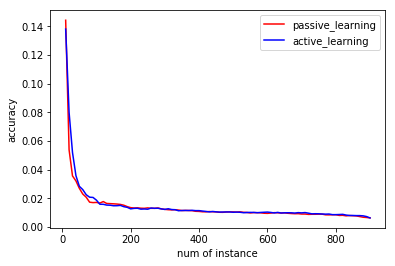

In [11]:
import matplotlib.pyplot as plt
x=list()
for i in range(90):
    x.append((i+1)*10)

passive_learning=1-pd.DataFrame(passive_test_error).describe().iloc[1,:]
active_learning=1-pd.DataFrame(active_test_error).describe().iloc[1,:]
plt.plot(x,passive_learning,color='red',label='passive_learning')
plt.plot(x,active_learning,color='blue',label='active_learning')
plt.xlabel('num of instance')
plt.ylabel('accuracy')
plt.legend()
plt.show()

(c) Average the test errors for the incrementally trained 90 SVMs in 1(b)i and1(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions.

According to this step, we can see that active learning method performs better than the passive learning method at first. But with the increase of data points in the pool, they perform almost equally finally.